In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',0)
pd.set_option('display.max_columns',0)

In [41]:
df = pd.read_csv('dataset/cardio_train.csv', sep=';')
print(df.shape)

(69301, 13)


## Data Description

In [42]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [43]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Features:
1. Age | Objective Feature | age | int (days) | (numeric feature)
2. Height | Objective Feature | height | int (cm) | (numeric feature)
3. Weight | Objective Feature | weight | float (kg) | (numeric feature)
4. Gender | Objective Feature | gender | categorical code | (categorical feautures)
5. Systolic blood pressure | Examination Feature | ap_hi | int | (numeric feature)
6. Diastolic blood pressure | Examination Feature | ap_lo | int | (numeric feature)
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | (categorical feautures)
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | (categorical feautures)
9. Smoking | Subjective Feature | smoke | binary | (categorical feautures)
10. Alcohol intake | Subjective Feature | alco | binary | (categorical feautures)
11. Physical activity | Subjective Feature | active | binary | (categorical feautures)
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary | (categorical feautures)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


Let's change the column names to be a bit clearer

In [46]:
df.columns = ['id','age','gender','height','weight','systolic_blood_pressure','diastolic_blood_pressure',
              'cholesterol','glucose_level','smoking','alcohol_intake','physical_activity','target']

I'm also going to change the values of the categorical variables, to improve the interpretation later on,

In [47]:
df.head()

,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoking,alcohol_intake,physical_activity,target
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [48]:
df.drop('id',1,inplace=True)

df['age'] = np.round(df['age'] / 365)

df['gender'][df['gender']==1] = 'male'
df['gender'][df['gender']==2] = 'female'

df['cholesterol'][df['cholesterol']==1] = 'normal'
df['cholesterol'][df['cholesterol']==2] = 'above normal'
df['cholesterol'][df['cholesterol']==3] = 'well above normal'

df['glucose_level'][df['glucose_level']==1] = 'normal'
df['glucose_level'][df['glucose_level']==2] = 'above normal'
df['glucose_level'][df['glucose_level']==3] = 'well above normal'

df['smoking'][df['smoking']==0] = 'no'
df['smoking'][df['smoking']==1] = 'yes'

df['alcohol_intake'][df['alcohol_intake']==0] = 'no'
df['alcohol_intake'][df['alcohol_intake']==1] = 'yes'

df['physical_activity'][df['physical_activity']==0] = 'no'
df['physical_activity'][df['physical_activity']==1] = 'yes'

In [49]:
df.head()

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose_level,smoking,alcohol_intake,physical_activity,target
0,62.0,male,155,69.0,130,80,above normal,above normal,no,no,yes,0
1,40.0,male,163,71.0,110,70,normal,normal,no,no,yes,1
2,60.0,male,165,70.0,120,80,normal,normal,no,no,yes,0
3,40.0,female,165,85.0,120,80,normal,normal,yes,yes,yes,0
4,64.0,male,155,62.0,120,80,normal,normal,no,no,yes,0


## Data exploration

**Value counts**

In [50]:
print("Percentage of patients not having Cardiovascular Disease: {:.2f}%".format((df['target'].value_counts()[0]/len(df))*100))
print("Percentage of patients having Cardiovascular Disease: {:.2f}%".format((df['target'].value_counts()[1]/len(df))*100))

Percentage of patients not having Cardiovascular Disease: 50.04%
Percentage of patients having Cardiovascular Disease: 49.96%


#### cardio

The target variable

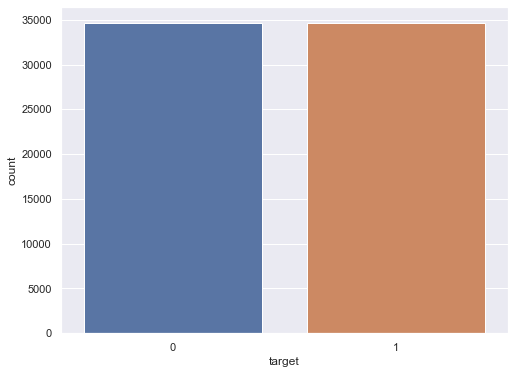

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(x="target", data=df)

We can see the data is almost evenly distributed among the two targets with 50.04% belonging to class 0 and 49.96% to class 1. Therefore our model will not be much biased in predicting the classes.

#### age

In [65]:
df['age'].min(), df['age'].max()

(30.0, 65.0)

The ages of the patient in our dataset ranges from 30 to 65

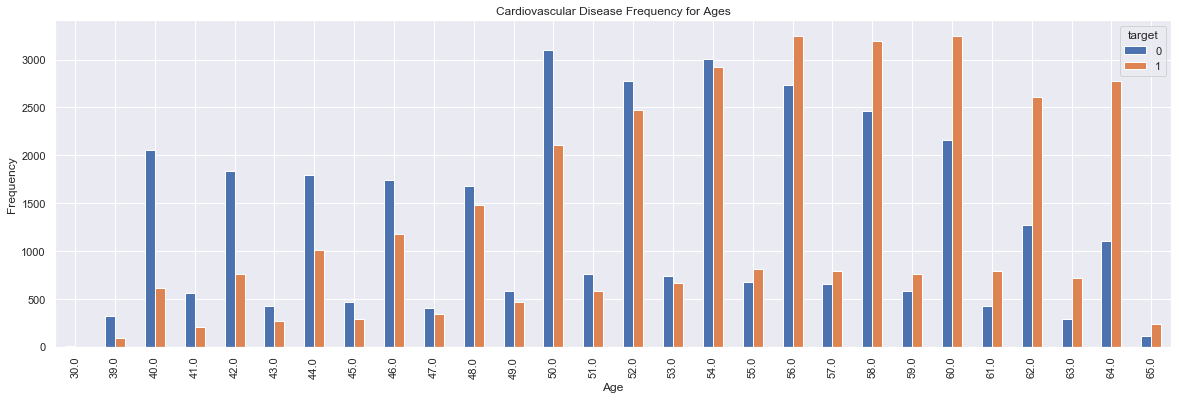

In [53]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Cardiovascular Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('CardiovascularDiseaseAndAges.png')
plt.show()

From the graph it is clear that older people are more likely to have cardiovascular diseases.

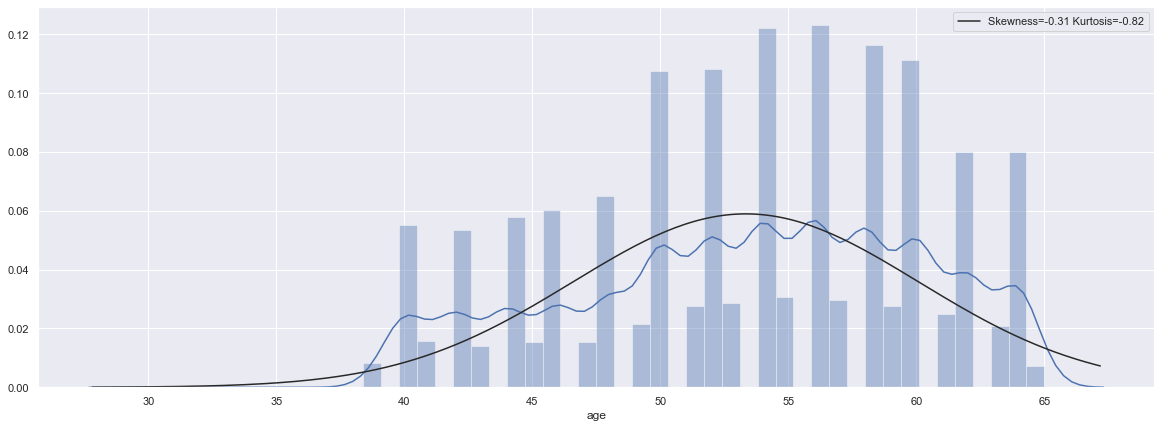

In [62]:
f,ax = plt.subplots(figsize = (20,7))
sns.set_style("darkgrid")
sns.distplot(df.age, fit=norm);
plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df['age'].skew(), 
            df['age'].kurt())
        ],
        loc='best')

We expect that our data points will be on red line for gaussian distributin. We see dist tails


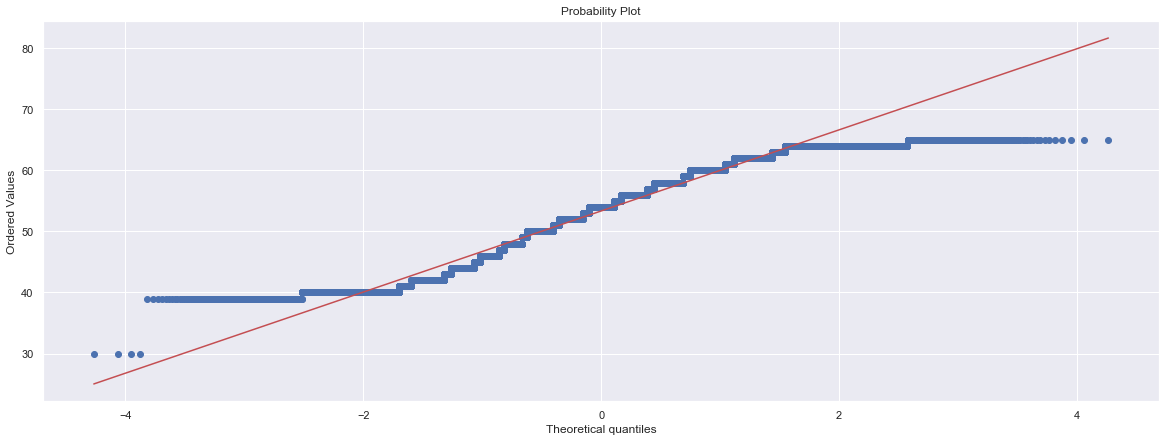

In [63]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(df["age"],plot=plt)
plt.show
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")

The age data is not normally distributed. We need to normalize it for fitting our model.

#### gender

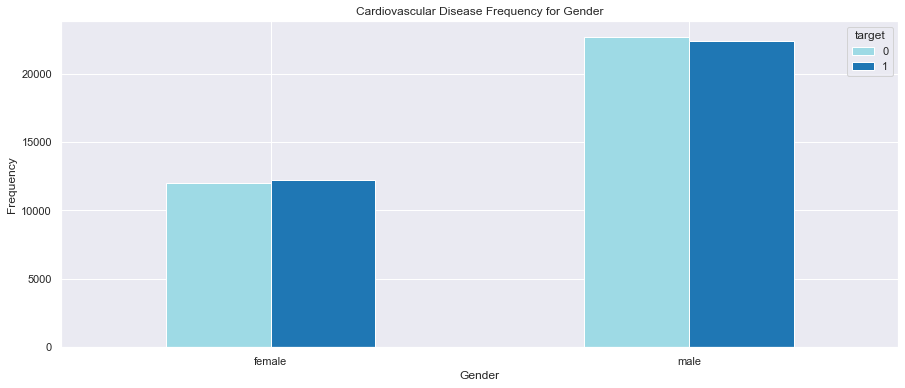

In [54]:
pd.crosstab(df.gender,df.target).plot(kind="bar",colormap="tab20_r",figsize=(15,6))
plt.title('Cardiovascular Disease Frequency for Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [59]:
perc_female_target = df[df['gender']=='female']['target'].sum() / len(df[df['gender']=='female']) * 100
perc_male_target = df[df['gender']=='male']['target'].sum() / len(df[df['gender']=='male']) * 100

print(f'Percentage of female patients having cardionvascular disease {np.round(perc_female_target,2)}%')
print(f'Percentage of male patients having cardionvascular disease {np.round(perc_male_target,2)}%')

Percentage of female patients having cardionvascular disease 50.54%
Percentage of male patients having cardionvascular disease 49.64%


In our dataset, the patients irrespective of the gender have equal number of affected and non-affected cases.

#### height

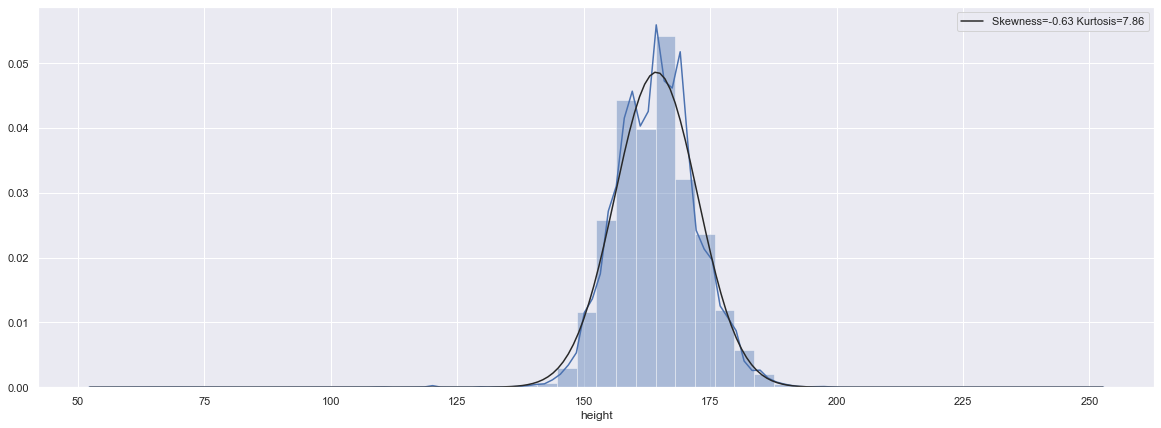

In [66]:
f,ax = plt.subplots(figsize = (20,7))
sns.set_style("darkgrid")
sns.distplot(df.height, fit=norm);
plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df['height'].skew(), 
            df['height'].kurt())
        ],
        loc='best')

The heights data is normally distributed.

In [73]:
df.groupby('target')['height'].mean().reset_index()

,target,height
0,0,164.452522
1,1,164.271764


It seems height doesn't play a major role in detecting the target

#### weights

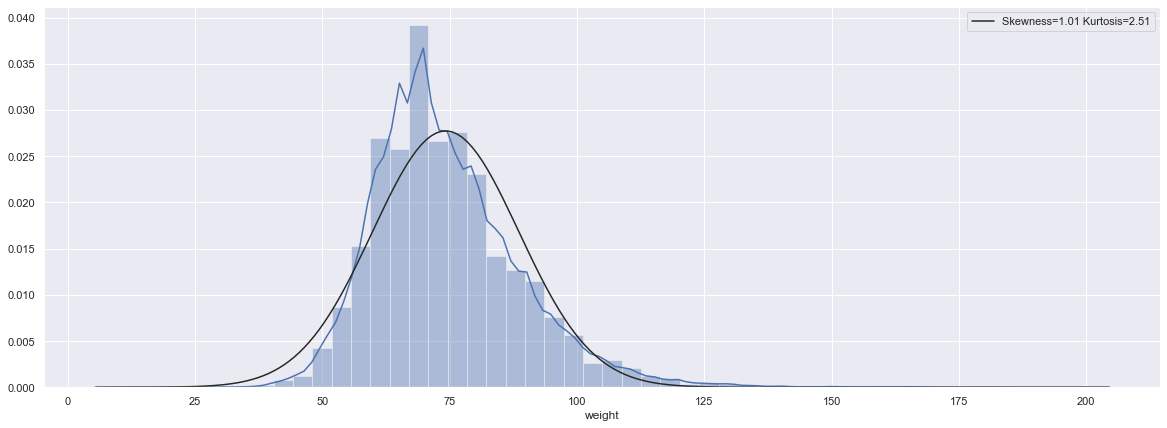

In [75]:
f,ax = plt.subplots(figsize = (20,7))
sns.set_style("darkgrid")
sns.distplot(df.weight, fit=norm);
plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df['weight'].skew(), 
            df['weight'].kurt())
        ],
        loc='best')

The weight data is normally distributed.

In [76]:
df.groupby('target')['weight'].mean().reset_index()

,target,weight
0,0,71.586058
1,1,76.824305


It seems patient with more weight has a tendency of having cardiovascular disease.

#### systolic_blood_pressure

In [83]:
df['systolic_blood_pressure'].min(), df['systolic_blood_pressure'].max()

(-150, 16020)

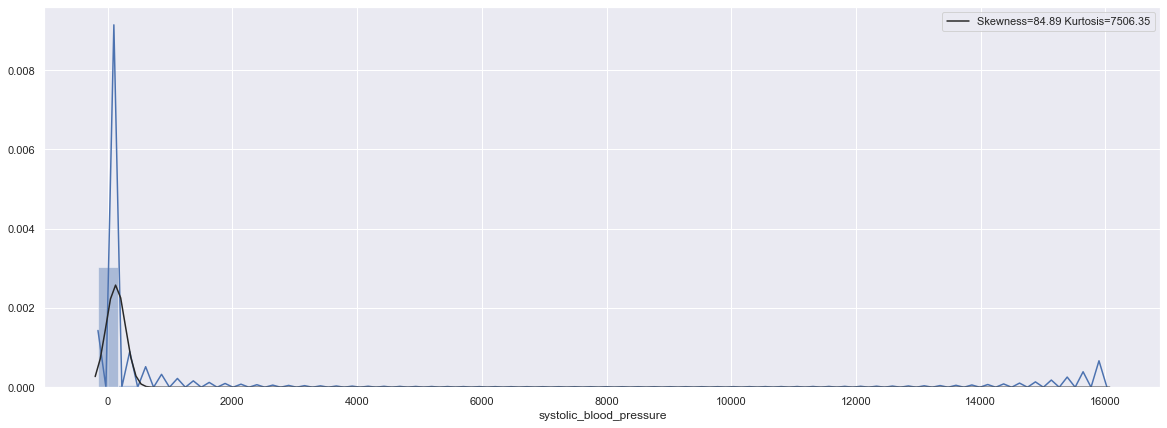

In [82]:
f,ax = plt.subplots(figsize = (20,7))
sns.set_style("darkgrid")
sns.distplot(df.systolic_blood_pressure, fit=norm);
plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df['systolic_blood_pressure'].skew(), 
            df['systolic_blood_pressure'].kurt())
        ],
        loc='best')

In [85]:
df.groupby('target')['systolic_blood_pressure'].mean().reset_index()

,target,systolic_blood_pressure
0,0,120.446034
1,1,137.226937


People with higher systolic blood pressure are prone to cardiovascular disease

#### diastolic_blood_pressure

In [86]:
df['diastolic_blood_pressure'].min(), df['diastolic_blood_pressure'].max()

(-70, 11000)

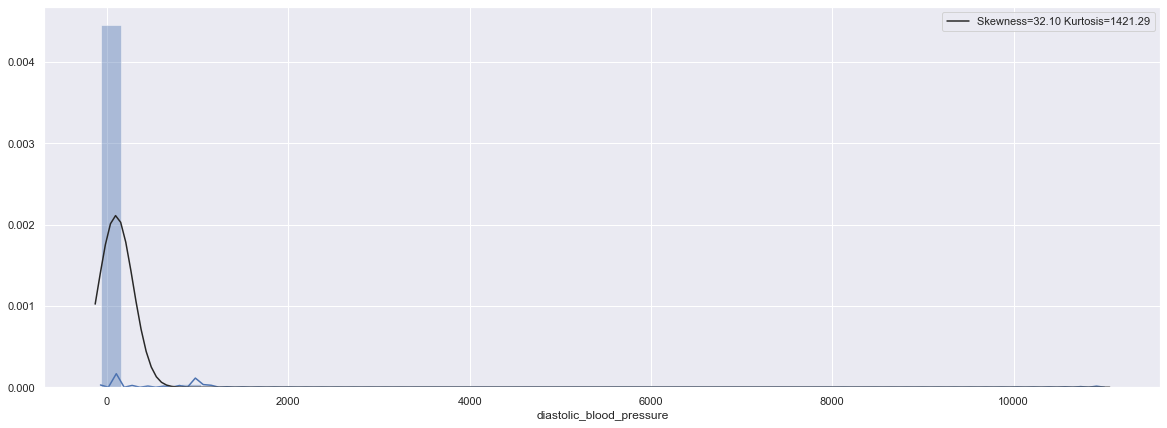

In [87]:
f,ax = plt.subplots(figsize = (20,7))
sns.set_style("darkgrid")
sns.distplot(df.diastolic_blood_pressure, fit=norm);
plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df['diastolic_blood_pressure'].skew(), 
            df['diastolic_blood_pressure'].kurt())
        ],
        loc='best')

In [88]:
df.groupby('target')['diastolic_blood_pressure'].mean().reset_index()

,target,diastolic_blood_pressure
0,0,84.314225
1,1,109.006268


People with higher diastolic blood pressure are prone to cardiovascular disease

#### cholesterol

In [91]:
df.cholesterol.value_counts()

normal               51868
above normal          9446
well above normal     7987
Name: cholesterol, dtype: int64

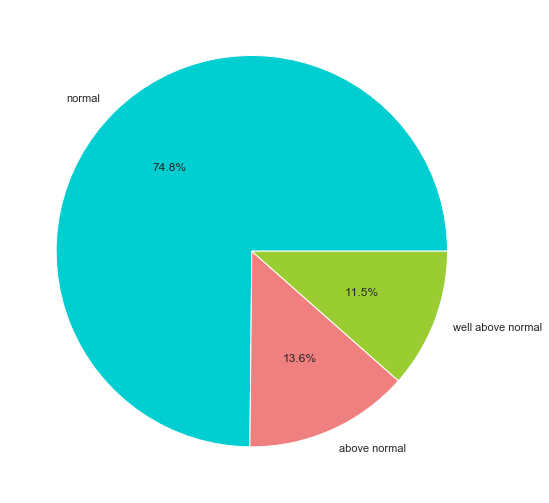

In [92]:
plt.figure(figsize = (20,9))
colors = ['darkturquoise','lightcoral','yellowgreen','deepskyblue']
plt.pie(x=df.cholesterol.value_counts(), 
        labels=df.cholesterol.value_counts().index,
        colors=colors,
        autopct='%1.1f%%');

In our dataset a major number of the patients have normal cholesterol level with 74%. Follwed by above normal level patients with 13.6% and well above normal with 11.5%

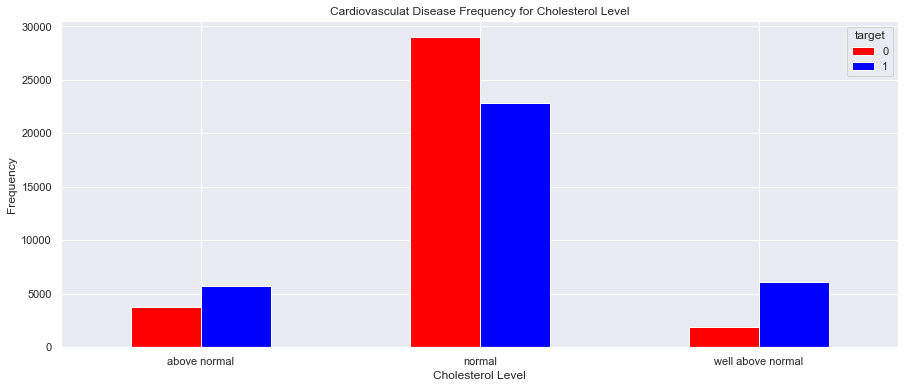

In [90]:
pd.crosstab(df.cholesterol,df.target).plot(kind="bar",colormap="bwr_r",figsize=(15,6))
plt.title('Cardiovasculat Disease Frequency for Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Patients having cholesterol level above normal are prone to have cardiovascular diseases.

#### glucose_level

In [93]:
df.glucose_level.value_counts()

normal               58885
well above normal     5277
above normal          5139
Name: glucose_level, dtype: int64

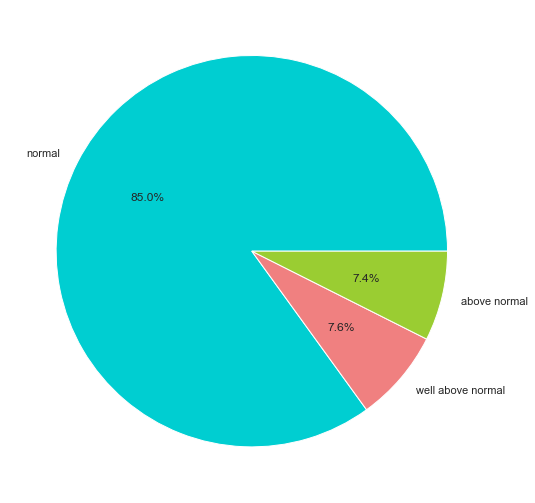

In [94]:
plt.figure(figsize = (20,9))
colors = ['darkturquoise','lightcoral','yellowgreen','deepskyblue']
plt.pie(x=df.glucose_level.value_counts(), 
        labels=df.glucose_level.value_counts().index,
        colors=colors,
        autopct='%1.1f%%');

In our dataset a major number of the patients have normal cholesterol level with 85%. Follwed by above normal level patients with 7.4% and well above normal with 7.6%

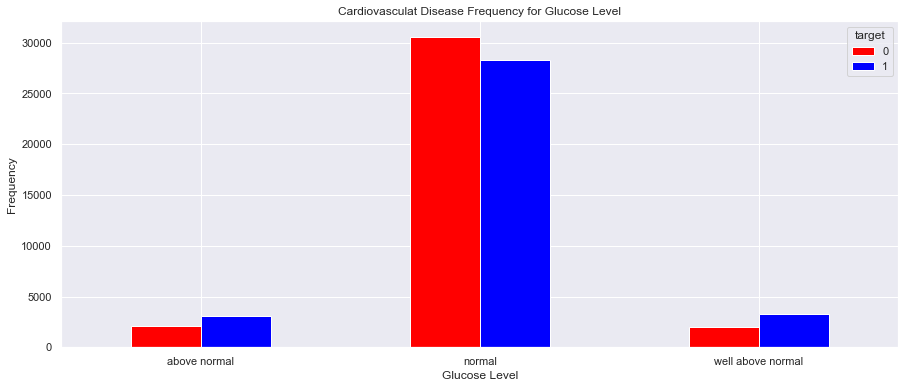

In [95]:
pd.crosstab(df.glucose_level,df.target).plot(kind="bar",colormap="bwr_r",figsize=(15,6))
plt.title('Cardiovasculat Disease Frequency for Glucose Level')
plt.xlabel('Glucose Level')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Patients having glucose level above normal are prone to have cardiovascular diseases.

#### smoking

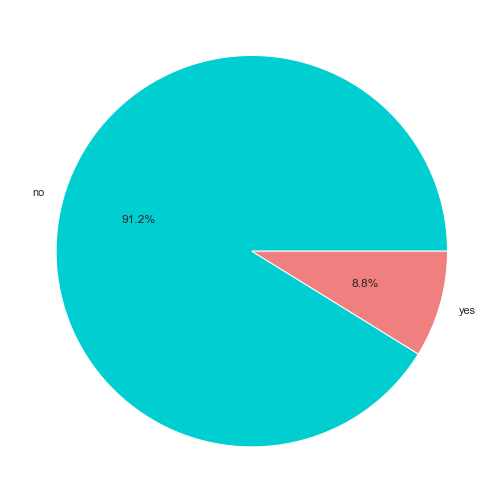

In [98]:
plt.figure(figsize = (20,9))
colors = ['darkturquoise','lightcoral','yellowgreen','deepskyblue']
plt.pie(x=df.smoking.value_counts(), 
        labels=df.smoking.value_counts().index,
        colors=colors,
        autopct='%1.1f%%');

About 92% of our dataset do not smoke.

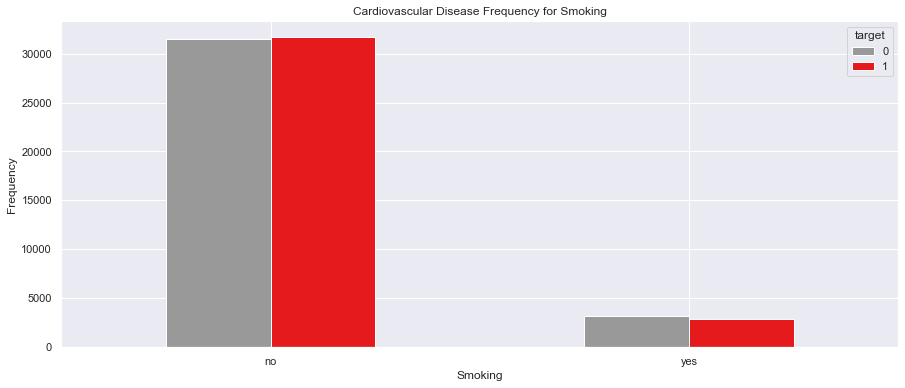

In [101]:
pd.crosstab(df.smoking,df.target).plot(kind="bar",colormap="Set1_r",figsize=(15,6))
plt.title('Cardiovascular Disease Frequency for Smoking')
plt.xlabel('Smoking')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### alcohol_intake

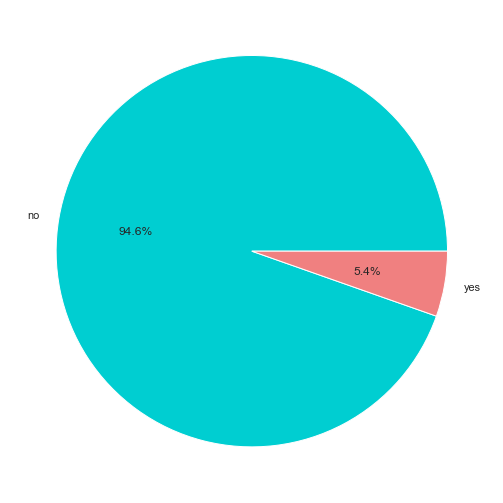

In [99]:
plt.figure(figsize = (20,9))
colors = ['darkturquoise','lightcoral','yellowgreen','deepskyblue']
plt.pie(x=df.alcohol_intake.value_counts(), 
        labels=df.alcohol_intake.value_counts().index,
        colors=colors,
        autopct='%1.1f%%');

About 94% of our dataset do not drink.

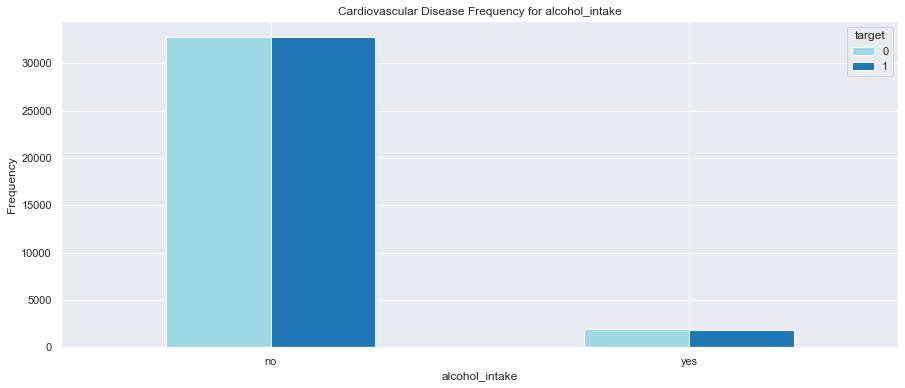

In [102]:
pd.crosstab(df.alcohol_intake,df.target).plot(kind="bar",colormap="tab20_r",figsize=(15,6))
plt.title('Cardiovascular Disease Frequency for alcohol_intake')
plt.xlabel('alcohol_intake')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### physical_activity

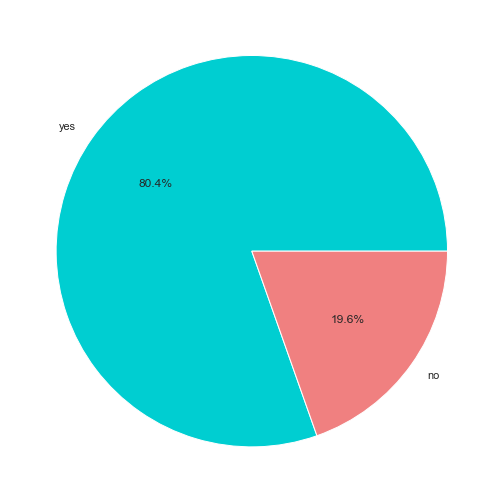

In [103]:
plt.figure(figsize = (20,9))
colors = ['darkturquoise','lightcoral','yellowgreen','deepskyblue']
plt.pie(x=df.physical_activity.value_counts(), 
        labels=df.physical_activity.value_counts().index,
        colors=colors,
        autopct='%1.1f%%');

About 90% of our dataset do not exercise.

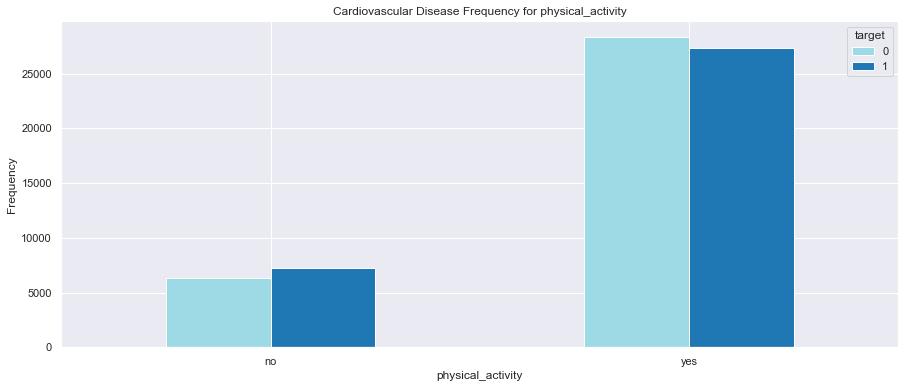

In [104]:
pd.crosstab(df.physical_activity,df.target).plot(kind="bar",colormap="tab20_r",figsize=(15,6))
plt.title('Cardiovascular Disease Frequency for physical_activity')
plt.xlabel('physical_activity')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Physical exercises reduces the chance of cardiovascular disease.

## Numerical Features

In [107]:
num_features = [var for var in df.columns if df[var].dtypes!='O' and var not in 'target']
df[num_features].head()

,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure
0,62.0,155,69.0,130,80
1,40.0,163,71.0,110,70
2,60.0,165,70.0,120,80
3,40.0,165,85.0,120,80
4,64.0,155,62.0,120,80


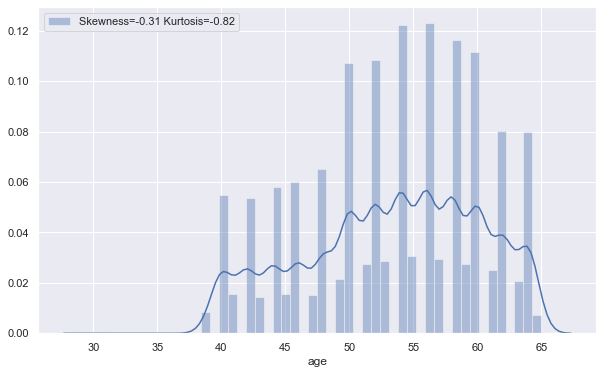

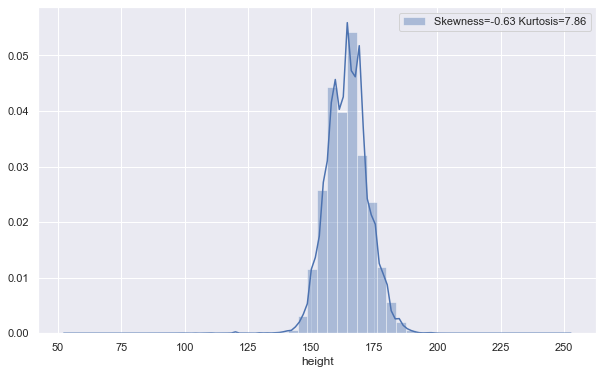

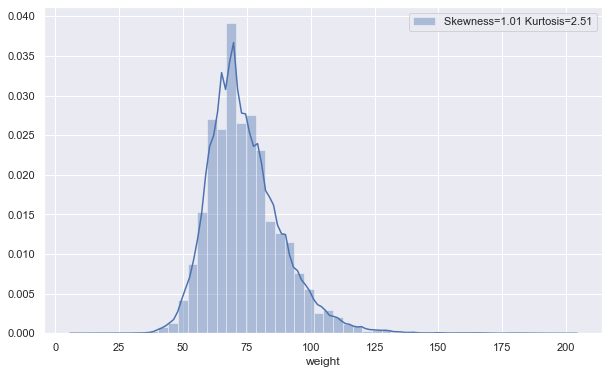

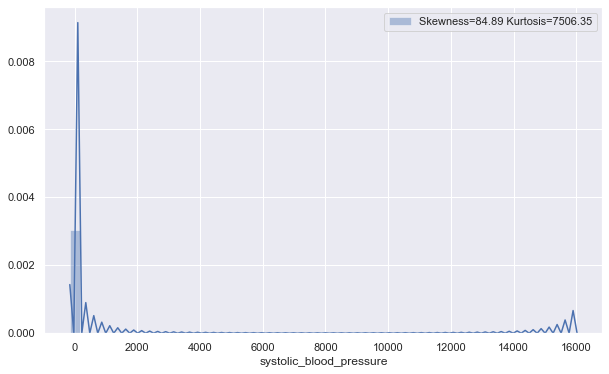

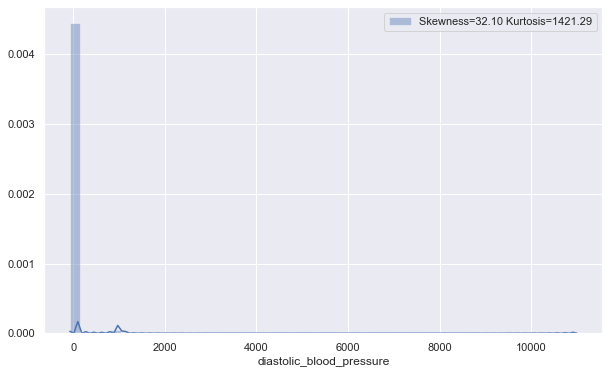

In [108]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()  
    df = df.dropna(axis=0)
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            df[var].skew(), 
            df[var].kurt())
        ],
        loc='best')
    plt.show()

for var in num_features:
    analyse_continuous(df, var)

## Categorical Features

In [115]:
cat_features = [var for var in df.columns if var not in num_features+['target']]
df[cat_features].head()

,gender,cholesterol,glucose_level,smoking,alcohol_intake,physical_activity
0,male,above normal,above normal,no,no,yes
1,male,normal,normal,no,no,yes
2,male,normal,normal,no,no,yes
3,female,normal,normal,yes,yes,yes
4,male,normal,normal,no,no,yes
